In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))


### Погрешность в окрестности нуля

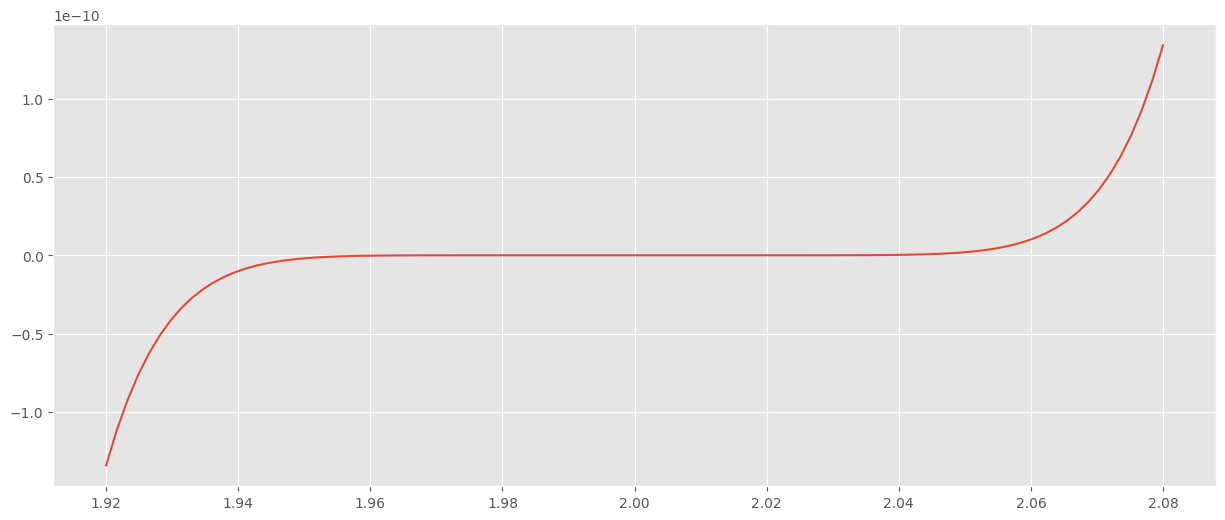

In [3]:
x = np.linspace(2.-0.08, 2.+0.08, 100)

plt.plot(x, (x-2)**9)

In [4]:
for subx in x:
    print((subx-2)**9) 

-1.3421772800000107e-10
-1.116962878683672e-10
-9.259884701639802e-11
-7.6460946278943e-11
-6.28732141348465e-11
-5.147581025470638e-11
-4.195332680554271e-11
-3.4030118623443134e-11
-2.7466034607297967e-11
-2.2052523901484984e-11
-1.7609091622814656e-11
-1.3980080047198695e-11
-1.1031752304359628e-11
-8.649656734456356e-12
-6.736251138757988e-12
-5.208767207466211e-12
-3.997296431439329e-12
-3.0430798009487494e-12
-2.2969845636601095e-12
-1.7181522558044645e-12
-1.2728031349777076e-12
-9.331830301817744e-13
-6.766394845988732e-13
-4.848148991699665e-13
-3.4294519033100173e-13
-2.392532532449658e-13
-1.6442727255470803e-13
-1.1117464607063702e-13
-7.384298289886068e-14
-4.810030630909273e-14
-3.066723313770123e-14
-1.909451571962207e-14
-1.1579919243503175e-14
-6.818967027383921e-15
-3.884618517448609e-15
-2.131449819922853e-15
-1.1203842860074334e-15
-5.604710818655318e-16
-2.64632790096347e-16
-1.1669890584058321e-16
-4.7410609672398254e-17
-1.74234207352039e-17
-5.648257179832502e-1

$x^9-18 x^8 + 144 x^7 - 672 x^6 + 2016 x^5- 4032 x^4 + 5376 x^3 - 4608 x^2 + 2304 x - 512$

In [5]:
def f(x):
    return x**9-18 *x**8 + 144 * x**7 - 672 * x**6 + 2016 * x**5- 4032 * x**4 + 5376 * x**3 - 4608 * x**2 + 2304 * x - 512

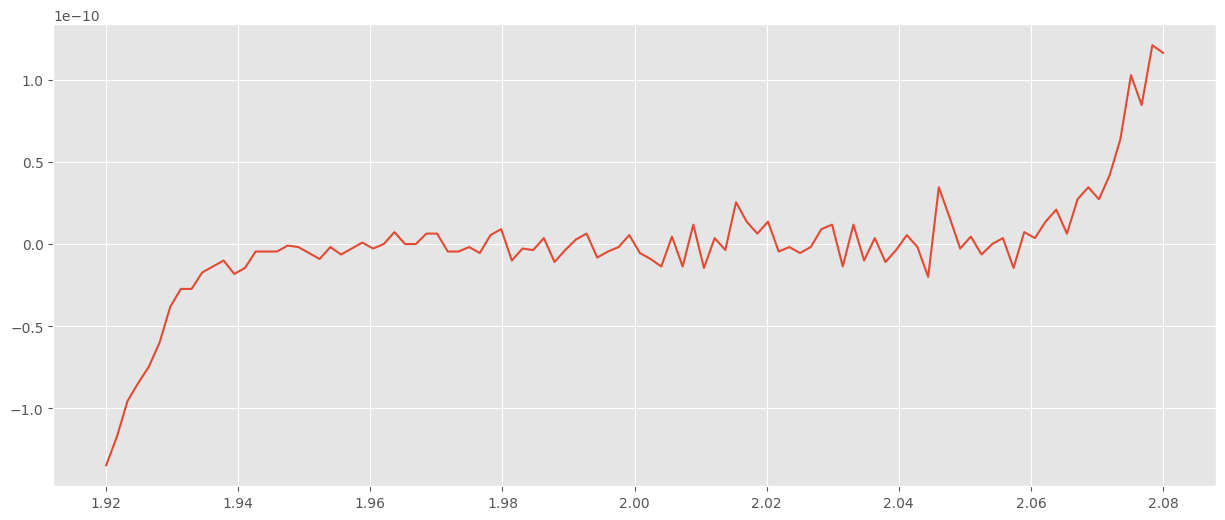

In [6]:
x = np.linspace(2.-0.08, 2.+0.08, 100)

plt.plot(x, f(x))

Получается, что та же функция вычисляется ну совсем не точно, даже флуктуирует вокруг нуля.

### Схема Горнера
$$
P_n(x) = x(x(x(x - 18) + 144)+ \ldots - 512).
$$
Так получится посчитать гораздо быстрее. Тем не менее, с вычислительной погрешностью здесь возникают проблемы. Перепишем схему в рекурентном виде:
$$
P_{k+1}(x)= x* P_k(x) + a_{k-1} (1 + \epsilon_k) 
$$
$$
\text{Error} = x*P_k(x) \epsilon _k + a_{k-1} \hat \epsilon _k 
$$
Погрешность удовлетворяет рекурентному соотношени выше, как следствие, экспоненциально растет, как следствие 10 в -15 поднимается на три порядка. Опасность вычислений в том, что мы сидим в окрестности нуля. Так что, например, метод бисекции не сработает даже для такого простого полинома.

### Быстрое возведение в степень

Просто представим в двоичном разложении саму стеень p, то есть 
$$n^p = n^{a_0 + a_1 2 + ... + a_k 2^k}$$
А потом перемножаем в духе:
$$
n^p = n^{a_0} * (n^2) ^{a_1} * (n^4) ^{a_2} * (n^8) ^{a_3} * ...
$$

#### Система BLAS, ATLAS, LAPACK
Хотим научиться делать методы линейной алгебры
1) $\alpha x[.] + y[.]$ 
2) $Ax, xy^{T}$
3) $C = AB+C$

Это пакеты, которые делают это быстро и безопасно. Разберем как перемножать матрицы(было на лекции).
$$
c_{ij} = \sum_{k=1}^m A_{ik} B_{kj} \
$$
Имеем такой код для обычной реализации, где ходим по строке и столбцу и это плохо, так кэш тогда просто не нормирует свою работу для обоих случаев
```cpp
for(i)
    for(j)
        for(k)
            c[i, j] = A[i, k]*B[k, j]
```
Улучшение. Зафиксируем один элемент $A$, тем самым мы суммируем только столбцы и кэш уже подстроиться
```cpp
for(i)
    for(k) d = A[k, i]
        for(j)
            c[i, j] = d*B[k, j]
```
Также есть блочные алгоритмы. В кэше должны храниться вектора, на каждом шаге закачали два ветрок и сделали n действий и выкинули, и уже не факт что в кэше есть следующий элемент. Идея: хотим закачать $n^2$ и вычисляли за $n^3$. Будем представлять матрицы в набор матриц и перемножаем уже маленькие подматрицы. И хранить надо именно по матрицам. 